In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import warnings

# Suppresult_data_datas harmless warnings for cleaner output
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
data_frame = pd.read_csv('mtcars.csv')
# Select Columns for Initial Analysis (mpg and hp)
# Drop all columns except ['car_model', 'mpg', 'hp'] 
data_frame_subset = data_frame[['car_model', 'mpg', 'hp']]

# Study_val the dataset
print("\n data_frame_subset Info")
data_frame_subset.info()
print("\n data_frame_subset Head")
print(data_frame_subset.head())
print("\n data_frame_subset Describe")
print(data_frame_subset.describe())



 data_frame_subset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_model  32 non-null     object 
 1   mpg        32 non-null     float64
 2   hp         32 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 900.0+ bytes

 data_frame_subset Head
           car_model   mpg   hp
0          Mazda RX4  21.0  110
1      Mazda RX4 Wag  21.0  110
2         Datsun 710  22.8   93
3     Hornet 4 Drive  21.4  110
4  Hornet Sportabout  18.7  175

 data_frame_subset Describe
             mpg          hp
count  32.000000   32.000000
mean   20.090625  146.687500
std     6.026948   68.562868
min    10.400000   52.000000
25%    15.425000   96.500000
50%    19.200000  123.000000
75%    22.800000  180.000000
max    33.900000  335.000000


Data Types:
The car_model field comprises textual (string) data, whereas both mpg and hp are numerical attributes, represented as floating-point or integer values.

Missing Values:
According to the .info() summary, each column contains an identical number of non-null observations, indicating the absence of missing entries in this portion of the dataset.

Descriptive Statistics:
The .describe() function provides a statistical overview including the count, mean, standard deviation, minimum, maximum, and quartile values—for the numerical columns (mpg and hp). For instance, the average mpg is approximately 20, and the mean hp is roughly 147, assuming the full mtcars dataset is being analyzed.

In [3]:
# Prepare Numeric Data for K-means
# Create a new data_frame 'cars' to hold numeric data only_val
# Drop the non-numeric 'car_model' column
cars_initial = data_frame_subset.drop('car_model', axis=1)
print("\n cars_initial Info")
cars_initial.info()
print("\nFirst 5 rows of cars_initial:")
print(cars_initial.head())
print("\nConfirmation: The `cars_initial` DataFrame consists entirely of numeric columns (`float64`/`int64`), so it is prepared for clustering.")


 cars_initial Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   hp      32 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 644.0 bytes

First 5 rows of cars_initial:
    mpg   hp
0  21.0  110
1  21.0  110
2  22.8   93
3  21.4  110
4  18.7  175

Confirmation: The `cars_initial` DataFrame consists entirely of numeric columns (`float64`/`int64`), so it is prepared for clustering.


In [4]:
# Step 2: K-means clustering on mpg & hp
# 2.1 Normalize the cars dataset so scale doesn't skew clustering
scaler = StandardScaler()
cars_scaled_initial = scaler.fit_transform(cars_initial)
cars_scaled_initial_data_frame = pd.DataFrame(cars_scaled_initial, columns=cars_initial.columns)

# Confirm normalization by showing top 10 instances (first 10)
print(" Top 10 Normalized Instances")
print(cars_scaled_initial_data_frame.head(10))
print("\nConfirmation: Data is normalized. Values are centered around 0 with a SD of 1.")

 Top 10 Normalized Instances
        mpg        hp
0  0.153299 -0.543655
1  0.153299 -0.543655
2  0.456737 -0.795570
3  0.220730 -0.543655
4 -0.234427  0.419550
5 -0.335572 -0.617748
6 -0.976163  1.456847
7  0.726459 -1.254944
8  0.456737 -0.765933
9 -0.150138 -0.351014

Confirmation: Data is normalized. Values are centered around 0 with a SD of 1.


In [5]:
# Run K-means for k=3, k=10, k=20
# Set the random seed to 42
random_seed = 42

# Run k-means for k=3, k=10, and k=20 
km3 = KMeans(n_clusters=3, random_state=random_seed, n_init=10).fit(cars_scaled_initial)
km10 = KMeans(n_clusters=10, random_state=random_seed, n_init=10).fit(cars_scaled_initial)
km20 = KMeans(n_clusters=20, random_state=random_seed, n_init=10).fit(cars_scaled_initial)

# Store the models
models = {'k=3': km3, 'k=10': km10, 'k=20': km20}
cars_initial_unscaled = cars_initial.copy()

print("K-means models for k=3, 10, and 20 are trained.")

for name, model in models.items():
    print(f"\n--- Model {name} ---")

    # The predictions (y_pred) for data 
    predictions = model.labels_
    print(f"\nPredictions (first 10): {predictions[:10]}")

    # The cluster centers (scaled) 
    scaled_centers = model.cluster_centers_
    print("\nScaled Cluster Centers:")
    print(scaled_centers)

    # Optional: Inverse transform centers to original scale for better interpretation
    centers_original = scaler.inverse_transform(scaled_centers)
    print("\nOriginal Scale Cluster Centers:")
    print(pd.DataFrame(centers_original, columns=cars_initial.columns))

K-means models for k=3, 10, and 20 are trained.

--- Model k=3 ---

Predictions (first 10): [0 0 0 0 0 0 2 1 0 0]

Scaled Cluster Centers:
[[-0.16324982 -0.16495907]
 [ 1.54525829 -1.0834728 ]
 [-1.12547303  1.50765326]]

Original Scale Cluster Centers:
         mpg          hp
0  19.122222  135.555556
1  29.257143   73.571429
2  13.414286  248.428571

--- Model k=10 ---

Predictions (first 10): [3 3 3 3 6 8 2 1 3 8]

Scaled Cluster Centers:
[[-0.70306882  0.31581995]
 [ 0.97932334 -1.09194053]
 [-0.93823285  1.47166539]
 [ 0.27130259 -0.64103379]
 [ 2.04697368 -1.2697629 ]
 [-1.63361037  0.93819827]
 [-0.15013833  0.41954967]
 [-0.85815908  2.79051468]
 [-0.29061864 -0.43992515]
 [ 1.737917   -0.49919927]]

Original Scale Cluster Centers:
         mpg          hp
0  15.920000  168.000000
1  25.900000   73.000000
2  14.525000  246.000000
3  21.700000  103.428571
4  32.233333   61.000000
5  10.400000  210.000000
6  19.200000  175.000000
7  15.000000  335.000000
8  18.366667  117.000000


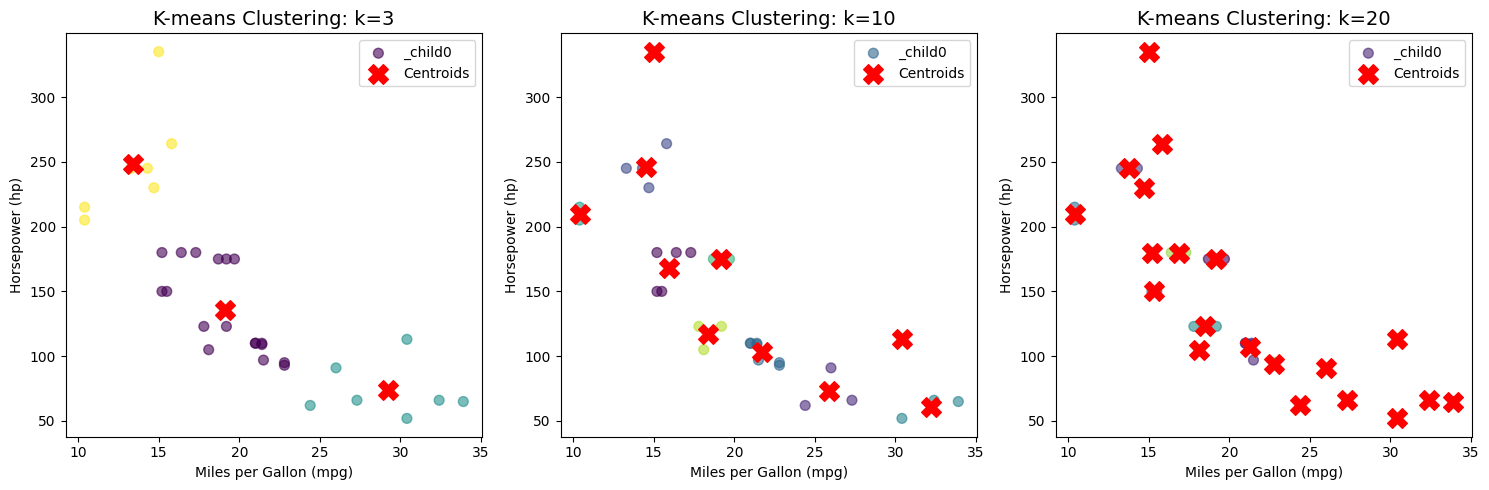

In [6]:
# Visualize the Clusters and Centroids based on mpg and hp

plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)

    # Get predictions and unscaled centers
    predictions = model.labels_
    centers_original = scaler.inverse_transform(model.cluster_centers_)

    # Scatter plot of data points, colored by_val cluster
    scatter = plt.scatter(cars_initial_unscaled['mpg'], cars_initial_unscaled['hp'],
                          c=predictions, cmap='viridis', s=50, alpha=0.6)

    # Plot the centroids
    plt.scatter(centers_original[:, 0], centers_original[:, 1],
                marker='X', s=200, color='red', label='Centroids')

    plt.title(f'K-means Clustering: {name}', fontsize=14)
    plt.xlabel('Miles per Gallon (mpg)')
    plt.ylabel('Horsepower (hp)')
    plt.legend(handles=[scatter] + [plt.scatter([], [], marker='X', s=200, color='red', label='Centroids')],
               loc='upper right')

plt.tight_layout()
plt.show()

Which K looks best?

For the features mpg and hp, k=3 appears to produce the most meaningful clusters.  

- k=3: The data is divided into three well-separated groups that are easy to interpret, such as "Low mpg / High hp," "Medium mpg / Medium hp," and "High mpg / Low hp." This level of clustering effectively captures the main structure in the dataset.  
- k=10 & k=20: As the number of clusters increases, the groups become smaller and more fragmented. Over-clustering occurs, where clusters may contain only a few points or centroids lie very close to individual points. This makes the clusters less generalizable and reduces their usefulness for understanding broader patterns or car types.  

The purpose of clustering is to identify meaningful groups, not just to assign every data point to its own cluster.


In [7]:
# Drop the non-numeric 'car_model' column from the original data_frame to get all numeric featuresult_data_data
cars_all_featuresult_data_data = data_frame.drop('car_model', axis=1, errors='ignore')

# Confirm all columns are numeric
print("--- Data Info (All Featuresult_data_data) ---")
cars_all_featuresult_data_data.info()
print("\nFirst 5 rows of data with all featuresult_data_data:")
print(cars_all_featuresult_data_data.head())

scaler_all = StandardScaler()
cars_scaled_all = scaler_all.fit_transform(cars_all_featuresult_data_data)
cars_scaled_all_data_frame = pd.DataFrame(cars_scaled_all, columns=cars_all_featuresult_data_data.columns)
print("Data with all featuresult_data_data is normalized.")

--- Data Info (All Featuresult_data_data) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB

First 5 rows of data with all featuresult_data_data:
    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.

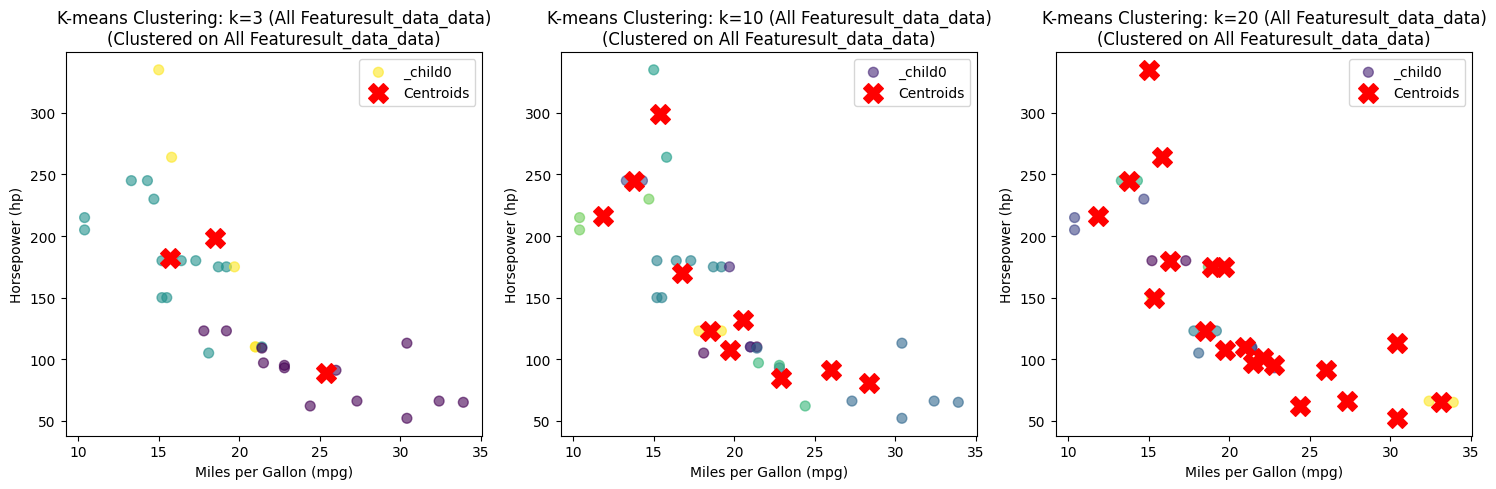

Visualization of clusters based on ALL featuresult_data_data complete. This data/clusters will be used for the following steps.


In [8]:
# Run k-means for k=3, k=10, and k=20 (using all featuresult_data_data)
km3_all = KMeans(n_clusters=3, random_state=random_seed, n_init=10).fit(cars_scaled_all)
km10_all = KMeans(n_clusters=10, random_state=random_seed, n_init=10).fit(cars_scaled_all)
km20_all = KMeans(n_clusters=20, random_state=random_seed, n_init=10).fit(cars_scaled_all)

models_all = {'k=3 (All Featuresult_data_data)': km3_all, 'k=10 (All Featuresult_data_data)': km10_all, 'k=20 (All Featuresult_data_data)': km20_all}

# Visualize the new clusters (step 2.3) and their centers
# We plot the same featuresult_data_data (mpg and hp) but the clusters are based on ALL featuresult_data_data.
plt.figure(figsize=(15, 5))
cars_all_featuresult_data_data_unscaled = cars_all_featuresult_data_data.copy()

for i, (name, model) in enumerate(models_all.items()):
    plt.subplot(1, 3, i + 1)

    # Predictions and Centers (All Featuresult_data_data)
    predictions = model.labels_

    # To plot centers in the original 'mpg' and 'hp' space,
    # we need the inverse-transformed centers, and then select the 'mpg' and 'hp' columns.
    centers_original = scaler_all.inverse_transform(model.cluster_centers_)
    centers_data_frame = pd.DataFrame(centers_original, columns=cars_all_featuresult_data_data.columns)

    # Scatter plot of data points, colored by_val cluster
    scatter = plt.scatter(cars_all_featuresult_data_data_unscaled['mpg'], cars_all_featuresult_data_data_unscaled['hp'],
                          c=predictions, cmap='viridis', s=50, alpha=0.6)

    # Plot the centroids (using mpg and hp from the center data_frames)
    plt.scatter(centers_data_frame['mpg'], centers_data_frame['hp'],
                marker='X', s=200, color='red', label='Centroids')

    plt.title(f'K-means Clustering: {name}\n(Clustered on All Featuresult_data_data)', fontsize=12)
    plt.xlabel('Miles per Gallon (mpg)')
    plt.ylabel('Horsepower (hp)')
    plt.legend(handles=[scatter] + [plt.scatter([], [], marker='X', s=200, color='red', label='Centroids')],
               loc='upper right')

plt.tight_layout()
plt.show()
print("Visualization of clusters based on ALL featuresult_data_data complete. This data/clusters will be used for the following steps.")

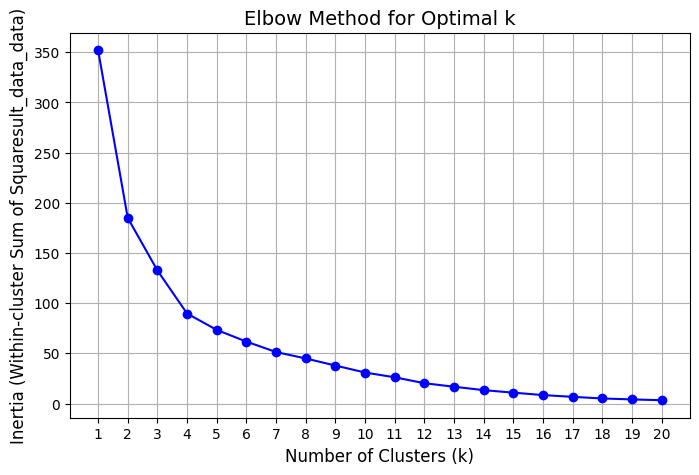


What is the optimal value for k (kmeans_n_cluster)?
Optimal k: Based on visual inspection of the Elbow Method plot, the 'elbow' (the point of diminishing returns) appears to be around k=3 or k=4.

What is the model score for the optimal k?
Model Score (Inertia) for k=3: 132.5414


In [9]:
# Grid Search for Optimal k
k_range = range(1, 21)
inertias = []

# Perform k-means for k=1 to k=20 and store the inertia
# Inertia is the sum of squared distances of samples to their closest cluster center.
for k in k_range:
    km = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
    km.fit(cars_scaled_all)
    inertias.append(km.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster Sum of Squaresult_data_data)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("\nWhat is the optimal value for k (kmeans_n_cluster)?")
print(f"Optimal k: Based on visual inspection of the Elbow Method plot, the 'elbow' (the point of diminishing returns) appears to be around k=3 or k=4.")

print("\nWhat is the model score for the optimal k?")
# The "score" for an optimal k in unsupervised K-means is typically_val the Inertia or Silhouette score.
# If we choose k=3 as optimal, the score (Inertia) is:
optimal_k = 3
optimal_score = [i for k, i in zip(k_range, inertias) if k == optimal_k][0]
print(f"Model Score (Inertia) for k={optimal_k}: {optimal_score:.4f}")
# NOTE: The value will depend on the exact mtcars.csv data.

In [10]:
pca = PCA().fit(cars_scaled_all)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Minimum number of dimensions required: {d}")

Minimum number of dimensions required: 6


PCA Questions and Answers

1. Is d a significant dimensionality reduction?
The dataset originally has 11 dimensions. Reducing it to d (e.g., 5–6) represents a substantial reduction while still preserving around 95% of the total variance. This indicates a meaningful simplification of the data.  
If d is equal to or greater than the original number of features, then the reduction is not significant, suggesting that most features contribute importantly to the variance, or the dataset is small.

2. Benefits of dimensionality reduction:
- Computational Efficiency: Algorithms like k-means or classification run faster with fewer features.  
- Reduced Storage: Less memory is required to store the dataset.  
- Improved Performance: Removing noise or redundant features can improve generalization and reduce the curse of dimensionality.  
- Data Visualization: Easier to visualize in 2D or 3D plots.

3. Possible disadvantages of dimensionality reduction:
- Information Loss: Some information is inevitably lost (e.g., 5%), which might be important.  
- Interpretability: PCA components are linear combinations of original features, making them harder to interpret.  
- Scalability: PCA can be computationally intensive on very large datasets.



 X_reduced DataFrame (First 5 Rows)
        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.657213 -1.735446 -0.601199  0.115522 -0.960653  0.017259
1 -0.629396 -1.550033 -0.382322  0.202307 -1.032949  0.245592
2 -2.779397  0.146457 -0.241238 -0.249139  0.405143  0.354348
3 -0.311771  2.363019 -0.135759 -0.511862  0.557997 -0.019606
4  1.974489  0.754402 -1.134402  0.075653  0.210836 -0.151580


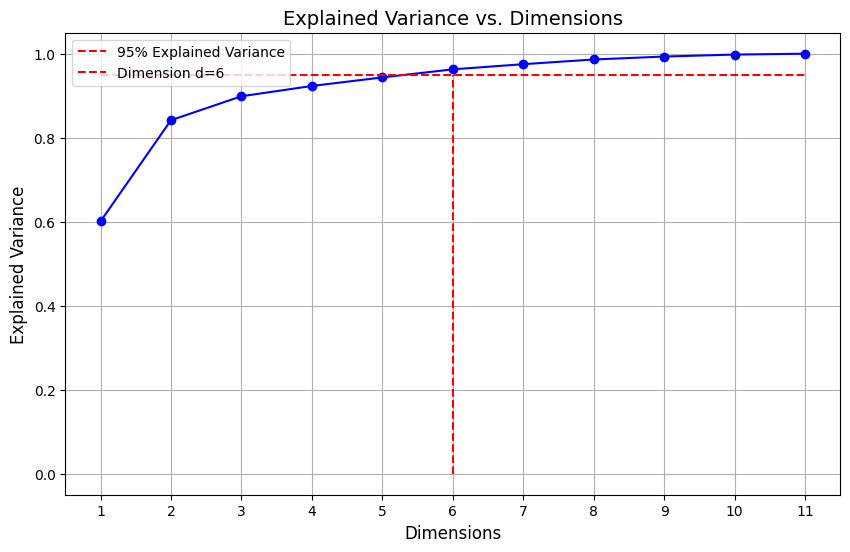

In [11]:
# Use the derived dimension 'd' to reduce the dataset
pca_reduced = PCA(n_components=d)
X_reduced = pca_reduced.fit_transform(cars_scaled_all)

# Convert to DataFrame and print
column_names = [f'PC{i+1}' for i in range(d)]
X_reduced_data_frame = pd.DataFrame(X_reduced, columns=column_names)

print("\n X_reduced DataFrame (First 5 Rows)")
print(X_reduced_data_frame.head())

initial_dimensions = cars_all_featuresult_data_data.shape[1]
# Plot the Explained Variance vs Dimensions curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, initial_dimensions + 1), cumulative_variance, marker='o', linestyle='-', color='blue')
plt.title('Explained Variance vs. Dimensions', fontsize=14)
plt.xlabel('Dimensions', fontsize=12) 
plt.ylabel('Explained Variance', fontsize=12)
plt.grid(True)

# Visualize the 0.95 point corresult_data_dataponding to the calculated reduced dimension d 
plt.hlines(y=0.95, xmin=1, xmax=initial_dimensions, color='r', linestyle='--', label='95% Explained Variance')
plt.vlines(x=d, ymin=0, ymax=0.95, color='r', linestyle='--', label=f'Dimension d={d}')
plt.legend()
plt.xticks(range(1, initial_dimensions + 1))
plt.show()